In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
df1 = pd.read_csv("heart.csv")
df2 = pd.read_csv("AirQualityUCI.csv") 

In [4]:
df1.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
df2.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/3/2004,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,10/3/2004,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,10/3/2004,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,10/3/2004,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,10/3/2004,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


# Data Cleaning

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   int64  
 4   NMHC(GT)       9357 non-null   int64  
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   int64  
 7   NOx(GT)        9357 non-null   int64  
 8   PT08.S3(NOx)   9357 non-null   int64  
 9   NO2(GT)        9357 non-null   int64  
 10  PT08.S4(NO2)   9357 non-null   int64  
 11  PT08.S5(O3)    9357 non-null   int64  
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(5), int64(8), object(2)
memory usage: 1.1+ MB


In [8]:
df2.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [9]:
df1.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [10]:
if "Unnamed: 15" in df2.columns and "Unnamed: 16" in df2.columns:
    df2.drop(["Unnamed: 15", "Unnamed: 16"], axis=1, inplace=True)

In [11]:
df2.sample(10)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
3135,19/7/2004,9:00:00,2.5,1282,-200,17.7,1230,263,594,145,1924,1696,27.1,34.9,1.2310
7280,8/1/2005,2:00:00,1.4,991,-200,4.6,744,187,863,95,1069,949,7.0,73.6,0.7417
3184,21/7/2004,10:00:00,-200.0,1421,-200,22.1,1354,279,545,194,2063,1854,33.9,26.8,1.3970
503,31/3/2004,17:00:00,2.4,1253,263,11.3,1026,128,810,103,1681,1048,15.2,52.9,0.9087
5343,19/10/2004,9:00:00,-200.0,1526,-200,30.1,1552,-200,441,-200,2074,1802,16.6,68.4,1.2829
5927,12/11/2004,17:00:00,2.6,1153,-200,12.9,1079,358,635,140,1496,1103,17.0,57.5,1.1071
1104,25/4/2004,18:00:00,1.5,1001,137,6.0,811,98,1122,83,1344,625,18.5,27.8,0.5843
3977,23/8/2004,11:00:00,1.6,937,-200,8.2,908,86,822,83,1466,826,32.9,24.9,1.2269
6860,21/12/2004,14:00:00,2.1,896,-200,7.8,891,297,921,132,935,766,8.5,34.3,0.3813
5774,6/11/2004,8:00:00,2.8,1231,-200,14.5,1134,448,587,87,1572,1143,14.6,74.2,1.2256


In [12]:
df2.dropna(inplace = True)

In [13]:
df2.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9352,4/4/2005,10:00:00,3.1,1314,-200,13.5,1101,472,539,190,1374,1729,21.9,29.3,0.7568
9353,4/4/2005,11:00:00,2.4,1163,-200,11.4,1027,353,604,179,1264,1269,24.3,23.7,0.7119
9354,4/4/2005,12:00:00,2.4,1142,-200,12.4,1063,293,603,175,1241,1092,26.9,18.3,0.6406
9355,4/4/2005,13:00:00,2.1,1003,-200,9.5,961,235,702,156,1041,770,28.3,13.5,0.5139
9356,4/4/2005,14:00:00,2.2,1071,-200,11.9,1047,265,654,168,1129,816,28.5,13.1,0.5028


In [14]:
df2.drop_duplicates()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/3/2004,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,10/3/2004,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,10/3/2004,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,10/3/2004,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,10/3/2004,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,4/4/2005,10:00:00,3.1,1314,-200,13.5,1101,472,539,190,1374,1729,21.9,29.3,0.7568
9353,4/4/2005,11:00:00,2.4,1163,-200,11.4,1027,353,604,179,1264,1269,24.3,23.7,0.7119
9354,4/4/2005,12:00:00,2.4,1142,-200,12.4,1063,293,603,175,1241,1092,26.9,18.3,0.6406
9355,4/4/2005,13:00:00,2.1,1003,-200,9.5,961,235,702,156,1041,770,28.3,13.5,0.5139


In [15]:
df1.drop_duplicates()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   int64  
 4   NMHC(GT)       9357 non-null   int64  
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   int64  
 7   NOx(GT)        9357 non-null   int64  
 8   PT08.S3(NOx)   9357 non-null   int64  
 9   NO2(GT)        9357 non-null   int64  
 10  PT08.S4(NO2)   9357 non-null   int64  
 11  PT08.S5(O3)    9357 non-null   int64  
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(5), int64(8), object(2)
memory usage: 1.1+ MB


# Data Transformation

In [97]:
df1.replace(",", ".", regex=True, inplace=True)

In [98]:
df2.drop(["Date","Time"] ,axis =1 , inplace = True)

KeyError: "['Date', 'Time'] not found in axis"

In [99]:
df2.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [100]:
df2.dtypes

CO(GT)           float64
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
dtype: object

In [101]:
df2 = df2.astype("float64")

In [102]:
df2.dtypes

CO(GT)           float64
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
dtype: object

In [103]:
df1.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,1,160,180,0,0,156,0,1.0,0,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,0,138,214,0,0,108,1,1.5,0,1
4,54,1,1,150,195,0,0,122,0,0.0,1,0


In [104]:
df1.Sex.replace(["M","F"],[1,0] , inplace =True)

In [105]:
df1.ChestPainType.value_counts()

ChestPainType
0    496
1    203
2    173
3     46
Name: count, dtype: int64

In [106]:
df1.ChestPainType.replace(["ASY","NAP","ATA", "TA"],[0,1,2,3] ,inplace =True)

In [107]:
df1.RestingECG.value_counts()

RestingECG
0    552
2    188
1    178
Name: count, dtype: int64

In [108]:
df1.RestingECG.replace(["Normal","ST","LVH"],[0,1,2], inplace=True)

In [109]:
df1.ExerciseAngina.value_counts()

ExerciseAngina
0    547
1    371
Name: count, dtype: int64

In [110]:
df1.ExerciseAngina.replace(["N","Y"],[0,1] , inplace =True)

In [111]:
df1.ST_Slope.value_counts()

ST_Slope
0    460
1    395
2     63
Name: count, dtype: int64

In [112]:
df1.ST_Slope.replace(["Flat","Up","Down"],[0,1,2], inplace=True)

In [113]:
df1.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,1,160,180,0,0,156,0,1.0,0,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,0,138,214,0,0,108,1,1.5,0,1
4,54,1,1,150,195,0,0,122,0,0.0,1,0


# Data Integration

In [114]:
df1.shape

(918, 12)

In [115]:
df2.shape

(9357, 13)

In [116]:
data1 =df1.iloc[:15,:3]
data1

,Age,Sex,ChestPainType
0,40,1,2
1,49,0,1
2,37,1,2
3,48,0,0
4,54,1,1
5,39,1,1
6,45,0,2
7,54,1,2
8,37,1,0
9,48,0,2


In [117]:
data2=df1.iloc[16:30,:19]
data2

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
16,38,1,0,110,196,0,0,166,0,0.0,0,1
17,43,0,2,120,201,0,0,165,0,0.0,1,0
18,60,1,0,100,248,0,0,125,0,1.0,0,1
19,36,1,2,120,267,0,0,160,0,3.0,0,1
20,43,0,3,100,223,0,0,142,0,0.0,1,0
21,44,1,2,120,184,0,0,142,0,1.0,0,0
22,49,0,2,124,201,0,0,164,0,0.0,1,0
23,44,1,2,150,288,0,0,150,1,3.0,0,1
24,40,1,1,130,215,0,0,138,0,0.0,1,0
25,36,1,1,130,209,0,0,178,0,0.0,1,0


In [118]:
final_df = pd.concat([data1,data2])
final_df.dropna(inplace=True)

In [119]:
final_df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [120]:
import seaborn as sns

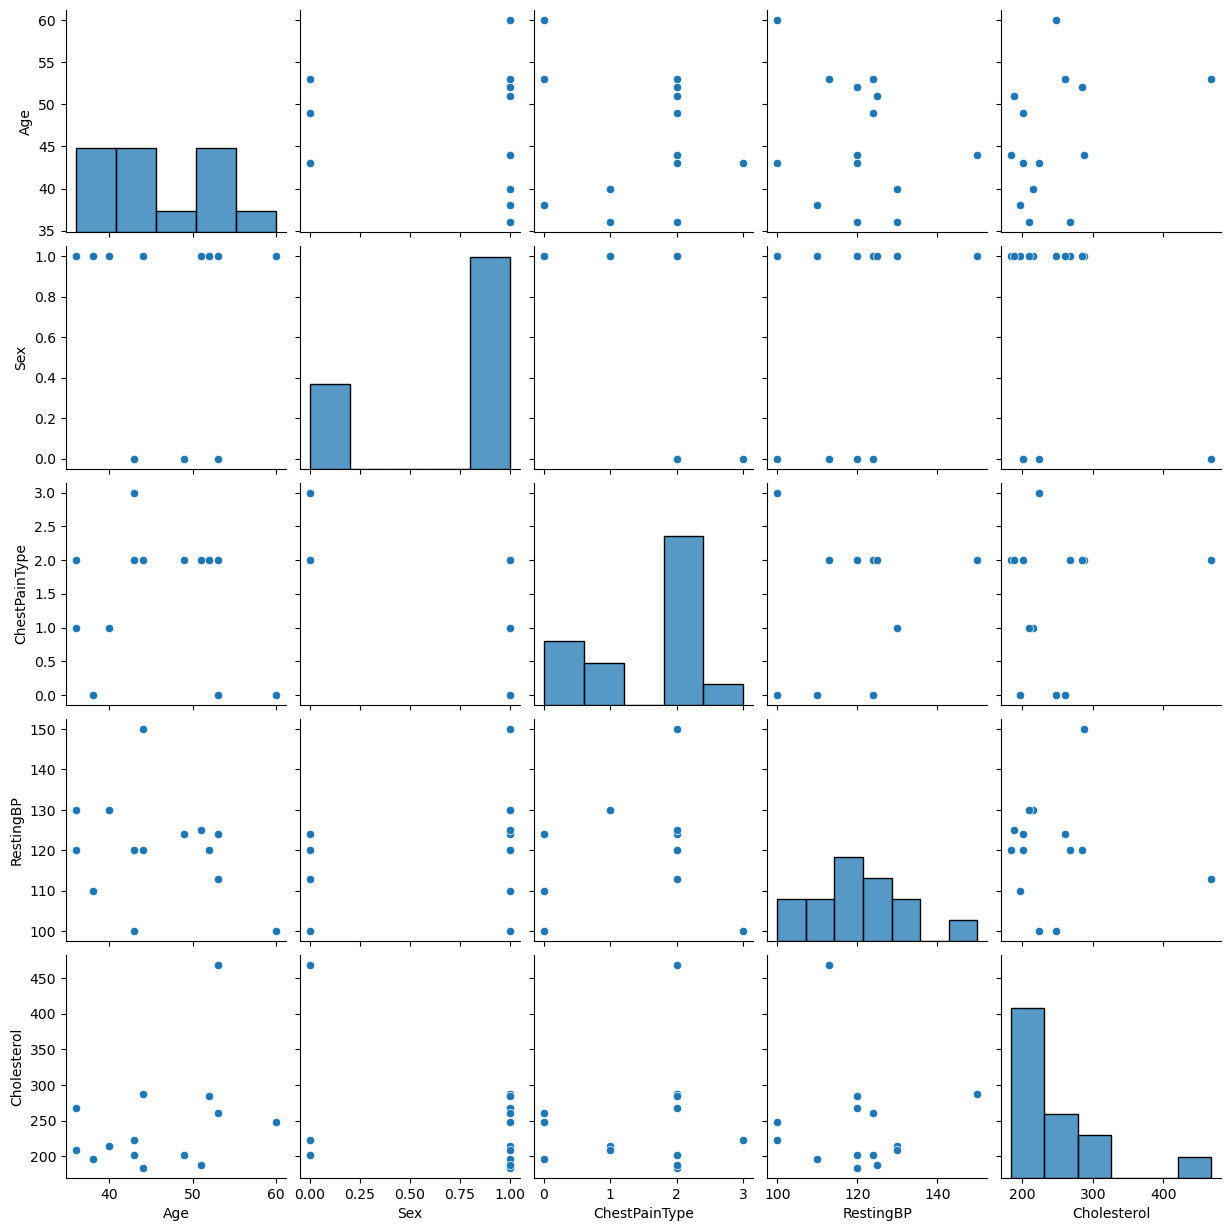

In [121]:
sns.pairplot(final_df.iloc[:,:5])

In [122]:
plt.figure(figsize=(20, 15))
sns.heatmap(final_df.corr(), annot=True, cmap="magma")
plt.show()

NameError: name 'plt' is not defined

# Model

In [123]:
X = final_df.drop(["HeartDisease"] , axis =1 )

In [124]:
y = final_df.HeartDisease

In [125]:
X

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
16,38,1,0,110.0,196.0,0.0,0.0,166.0,0.0,0.0,0.0
17,43,0,2,120.0,201.0,0.0,0.0,165.0,0.0,0.0,1.0
18,60,1,0,100.0,248.0,0.0,0.0,125.0,0.0,1.0,0.0
19,36,1,2,120.0,267.0,0.0,0.0,160.0,0.0,3.0,0.0
20,43,0,3,100.0,223.0,0.0,0.0,142.0,0.0,0.0,1.0
21,44,1,2,120.0,184.0,0.0,0.0,142.0,0.0,1.0,0.0
22,49,0,2,124.0,201.0,0.0,0.0,164.0,0.0,0.0,1.0
23,44,1,2,150.0,288.0,0.0,0.0,150.0,1.0,3.0,0.0
24,40,1,1,130.0,215.0,0.0,0.0,138.0,0.0,0.0,1.0
25,36,1,1,130.0,209.0,0.0,0.0,178.0,0.0,0.0,1.0


In [126]:
y

16    1.0
17    0.0
18    1.0
19    1.0
20    0.0
21    0.0
22    0.0
23    1.0
24    0.0
25    0.0
26    0.0
27    0.0
28    0.0
29    0.0
Name: HeartDisease, dtype: float64

In [127]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2, random_state=7)

model = LogisticRegression()
model.fit(Xtrain, ytrain)

LogisticRegression()

In [128]:
final_pred=model.predict(Xtest)
final_pred

array([1., 0., 0.])

In [129]:
pd.DataFrame({"Actual":ytest, "Predict":final_pred})

,Actual,Predict
28,0.0,1.0
27,0.0,0.0
18,1.0,0.0


In [130]:
print("Accuracy of the Logistics Regression Model is ::",accuracy_score(ytest, final_pred)*100, "%")

Accuracy of the Logistics Regression Model is :: 33.33333333333333 %
